<a href="https://colab.research.google.com/github/joi97/FSI_Lab/blob/master/SegundaPractica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


train  validation


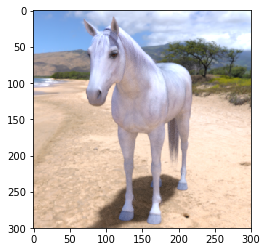

In [0]:
!ls "/content/drive/My Drive/horses-or-humans-dataset/horse-or-human/"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/horses-or-humans-dataset/horse-or-human/train/horses/horse01-0.png', 'r')
imshow(np.asarray(pil_im))


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/horses-or-humans-dataset/horse-or-human/train'
validation_data_dir = '/content/drive/My Drive/horses-or-humans-dataset/horse-or-human/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(200, activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 10

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 126s 1s/step - loss: 0.6157 - acc: 0.6601 - val_loss: 0.6893 - val_acc: 0.8359
Epoch 2/10
100/100 [==============================] - 121s 1s/step - loss: 0.2156 - acc: 0.9221 - val_loss: 1.3829 - val_acc: 0.8281
Epoch 3/10
100/100 [==============================] - 124s 1s/step - loss: 0.1075 - acc: 0.9645 - val_loss: 2.9066 - val_acc: 0.7227
Epoch 4/10
100/100 [==============================] - 121s 1s/step - loss: 0.0640 - acc: 0.9815 - val_loss: 2.3675 - val_acc: 0.7656
Epoch 5/10
100/100 [==============================] - 124s 1s/step - loss: 0.0410 - acc: 0.9860 - val_loss: 1.9466 - val_acc: 0.7969
Epoch 6/10
100/100 [==============================] - 120s 1s/step - loss: 0.0187 - acc: 0.9935 - val_loss: 2.2815 - val_acc: 0.7891
Epoch 7/10
100/100 [==============================] - 120s 1s/step - loss: 0.0172 - acc: 0.9945 - val_loss: 1.4973 - va